# **Final project** 

## (Python 2 Swansea course - Aura Frizzati)



## **1. Introduction**
- For this final project I am choosing the data mining/analytics path.
- I will look at some open data downloaded from [StatsWales repository](https://statswales.gov.wales/catalogue)
- Specifically, I will download monthly data about [**number of attendances in NHS Wales emergency departments by age band, sex and site**](https://statswales.gov.wales/Catalogue/Health-and-Social-Care/NHS-Hospital-Waiting-Times/emergency-department/emergencyattendances-by-age-sex-site)

In [1]:
import pandas as pd

## **2. Data Retrieval**

The data could be downloaded as a `.csv` file from StatsWales, however I will make use of the library [**`statswalespy`**](https://pypi.org/project/statswalespy/), which connects directly to StatsWales' application programme interface (API). It allows to download data and directly store it as an object in python, without need to filter and download the data manually.

In [11]:
from statswalespy.download_data import statswales_get_dataset

#ED_wales_raw_data = statswales_get_dataset("HLTH0037")
## data gets saves as a pandas dataframe

Data extracted with 95597 rows, and 23 columns.


In [20]:
## save data as a csv file
#ED_wales_raw_data.to_csv('/Users/aurafrizzati/Desktop/python2-swansea-course/final_project/raw_data/ED_wales_raw_data.csv', index=False)

In [2]:
## re-import data as CSV file
ED_wales_raw_data = pd.read_csv('/Users/aurafrizzati/Desktop/python2-swansea-course/final_project/raw_data/ED_wales_raw_data.csv')

## **3. Data Exploration, Visualisation and Cleaning**

In [3]:
ED_wales_raw_data.shape

(95597, 23)

- The dataset contains 95,597 records and 23 columns.

- The following is the extract of the first 5 records:

In [4]:
ED_wales_raw_data.head()

,Data,Age_Code,Age_ItemName_ENG,Age_SortOrder,Age_Hierarchy,Age_ItemNotes_ENG,Date_Code,Date_ItemName_ENG,Date_SortOrder,Date_ItemNotes_ENG,...,Sex_Hierarchy,Sex_ItemNotes_ENG,Hospital_Code,Hospital_ItemName_ENG,Hospital_SortOrder,Hospital_Hierarchy,Hospital_ItemNotes_ENG,Hospital_AltCode1,RowKey,PartitionKey
0,1.0,0-4,0-4,2.0,All,NaN,2016m04,April 2016,119,NaN,...,99,NaN,7A47A4BV,University Hospital Of Wales,28.0,W11000029,NaN,7A4BV,0,NaN
1,1.0,55-59,55-59,11.0,All,NaN,2016m04,April 2016,119,NaN,...,99,NaN,7A67A6AV,Ysbyty Ystrad Fawr,43.0,W11000028,NaN,7A6AV,1,NaN
2,1.0,60-64,60-64,12.0,All,NaN,2016m04,April 2016,119,NaN,...,99,NaN,7A3x7A3C4,Singleton Hospital,25.0,W11000026,NaN,7A3C4,2,NaN
3,1.0,55-59,55-59,11.0,All,NaN,2016m04,April 2016,119,NaN,...,99,NaN,7A67A6AM,Nevill Hall Hospital,40.0,W11000028,This hospital has been re-classified following...,7A6AM,3,NaN
4,2.0,55-59,55-59,11.0,All,NaN,2016m04,April 2016,119,NaN,...,99,NaN,7A67A6AU,Ysbyty Aneurin Bevan,42.0,W11000028,NaN,7A6AU,4,NaN


- All columns are coded as `Dtype` = `object` except for columns `Data` (which contains the number of emergency attendances), `Age_SortOrder` and `Hospital_SortOrder`, which are instead `float64`.
- It looks like there are no null values, although missing values might be represented in ways that the `.info()` function is unable to detect, therefore, further investigation is required.

In [5]:
ED_wales_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95597 entries, 0 to 95596
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    95597 non-null  float64
 1   Age_Code                95597 non-null  object 
 2   Age_ItemName_ENG        95597 non-null  object 
 3   Age_SortOrder           95597 non-null  float64
 4   Age_Hierarchy           95597 non-null  object 
 5   Age_ItemNotes_ENG       0 non-null      float64
 6   Date_Code               95597 non-null  object 
 7   Date_ItemName_ENG       95597 non-null  object 
 8   Date_SortOrder          95597 non-null  int64  
 9   Date_ItemNotes_ENG      0 non-null      float64
 10  Sex_Code                95597 non-null  int64  
 11  Sex_ItemName_ENG        95597 non-null  object 
 12  Sex_SortOrder           95597 non-null  int64  
 13  Sex_Hierarchy           95597 non-null  int64  
 14  Sex_ItemNotes_ENG       0 non-null    

- When columns are checked for number of blank values they contain (i.e. only `''` in a column's cell), we obtain different results, showing that some of the columns are completely empty. These columns can be removed since they do not add any information.

In [6]:
#{col:(ED_wales_raw_data[col] == '').sum() for col in ED_wales_raw_data.columns}

{'Data': 0,
 'Age_Code': 0,
 'Age_ItemName_ENG': 0,
 'Age_SortOrder': 0,
 'Age_Hierarchy': 0,
 'Age_ItemNotes_ENG': 0,
 'Date_Code': 0,
 'Date_ItemName_ENG': 0,
 'Date_SortOrder': 0,
 'Date_ItemNotes_ENG': 0,
 'Sex_Code': 0,
 'Sex_ItemName_ENG': 0,
 'Sex_SortOrder': 0,
 'Sex_Hierarchy': 0,
 'Sex_ItemNotes_ENG': 0,
 'Hospital_Code': 0,
 'Hospital_ItemName_ENG': 0,
 'Hospital_SortOrder': 0,
 'Hospital_Hierarchy': 0,
 'Hospital_ItemNotes_ENG': 0,
 'Hospital_AltCode1': 0,
 'RowKey': 0,
 'PartitionKey': 0}

In [49]:
# ED_wales_data_cln1 = ED_wales_raw_data.copy().drop(columns=[
#     'Age_ItemNotes_ENG', 
#     'Date_ItemNotes_ENG',
#     'Sex_ItemNotes_ENG',
#     'Hospital_ItemNotes_ENG',
#     'PartitionKey'])


- I then check the unique values within each column of the dataset (excluding the first row `Data`, which contains the number of monthly emergency attendances):

In [7]:
{col:ED_wales_raw_data[col].unique() for col in ED_wales_raw_data.iloc[:,1:].columns}

{'Age_Code': array(['0-4', '55-59', '60-64', '45-49', '30-34', '85', '18-24', '25-29',
        '40-44', '50-54', '5-17', '35-39', '70-74', '75-79', '80-84',
        'Unknown', '65-69'], dtype=object),
 'Age_ItemName_ENG': array(['0-4', '55-59', '60-64', '45-49', '30-34', '85 and over', '18-24',
        '25-29', '40-44', '50-54', '5-17', '35-39', '70-74', '75-79',
        '80-84', 'Unknown', '65-69'], dtype=object),
 'Age_SortOrder': array([ 2., 11., 12.,  9.,  6., 17.,  4.,  5.,  8., 10.,  3.,  7., 14.,
        15., 16., 18., 13.]),
 'Age_Hierarchy': array(['All'], dtype=object),
 'Age_ItemNotes_ENG': array([nan]),
 'Date_Code': array(['2016m04', '2016m05', '2016m06', '2016m07', '2016m08', '2016m09',
        '2016m10', '2016m11', '2016m12', '2017m01', '2017m02', '2017m03',
        '2017m04', '2017m05', '2017m06', '2017m07', '2017m08', '2017m09',
        '2017m10', '2017m11', '2017m12', '2018m01', '2018m02', '2018m03',
        '2018m04', '2018m05', '2018m06', '2018m07', '2018m08', '2018

- After having inspected the columns' unique values, I will retain only the following columns for further analysis (I remove columns that are redundant, columns with values that are not well defined and columns with missing values):
    - `Data` = the monthly emergency attendances recorded in Welsh hospitals (float)
    - `Age_ItemName_ENG` = the age group of the individual/s presenting at the emergency dept (string)
    - `Date_ItemName_ENG` = date and year when the emergency attendances where recorded (string)
    - `Sex_ItemName_ENG` =  the sex group of the individual/s presenting at the emergency dept (string)
    - `Hospital_ItemName_ENG` =  the emergency dept's hospital (string)
    - `Hospital_Hierarchy` =  the Welsh Local Health Board code where a hospital is located (string)
    
    
- Note: records are at an **aggregated level**, i.e. each record in the dataset does not belong to a specific individual, but to groups of individuals with the same characteristics of age group and sex, presenting at the same emergency dept in the same month-year. This is common of open source data containing confidential information, in order to ensure anonimity

In [17]:
ED_wales_data_cln = ED_wales_raw_data[['Data',
                                        'Age_ItemName_ENG',
                                        'Date_ItemName_ENG',
                                        'Sex_ItemName_ENG',
                                        'Hospital_ItemName_ENG',
                                        'Hospital_Hierarchy']].copy()

In [18]:
def LHB_names(row):
    if row['Hospital_Hierarchy'] == 'W92000004':
        return 'Wales'
    elif row['Hospital_Hierarchy'] == 'W11000023':
        return 'Betsi Cadwaladr'
    elif row['Hospital_Hierarchy'] == 'W11000024':
        return 'Powys Teaching'
    elif row['Hospital_Hierarchy'] == 'W11000025':
        return 'Hywel Dda'
    elif row['Hospital_Hierarchy'] == 'W11000031':
        return 'Swansea Bay'
    elif row['Hospital_Hierarchy'] == 'W11000026':
        return 'Abertawe Bro Morgannwg'
    elif row['Hospital_Hierarchy'] == 'W11000030':
        return 'Cwm Taf Morgannwg'
    elif row['Hospital_Hierarchy'] == 'W11000027':
        return 'Cwm Taf'
    elif row['Hospital_Hierarchy'] == 'W11000028':
        return 'Aneurin Bevan'
    elif row['Hospital_Hierarchy'] == 'W11000029':
        return 'Cardiff & Vale'
    else:
        return 'Other'

In [19]:
ED_wales_data_cln['LHB'] = ED_wales_data_cln.apply(LHB_names, axis=1)

- The next step is to start **plotting** the data in order to get a first grasp of the variables:

In [9]:
import seaborn as sns
#sns.set(style="darkgrid")

#### **Sex group** variable (`Sex_ItemName_ENG`)

In [28]:
print("Number of unique categories for Sex group variable: ", ED_wales_data_cln['Sex_ItemName_ENG'].nunique())

Number of unique categories for Sex group variable:  3


blabla


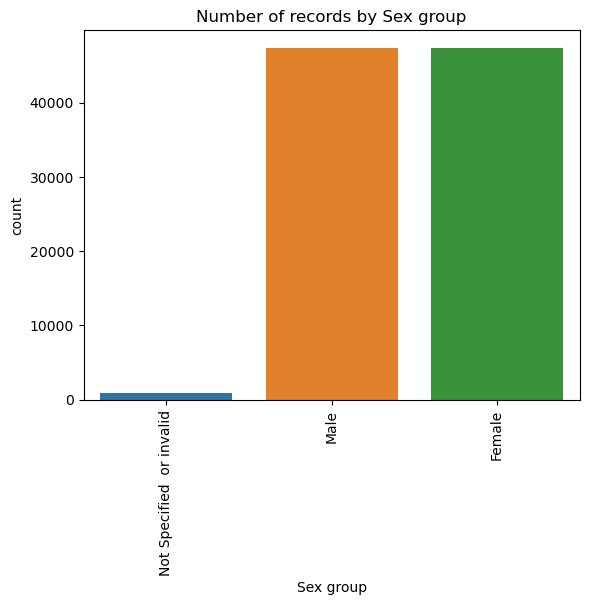

In [22]:
## counts by Sex group variable
plot = sns.countplot(x="Sex_ItemName_ENG", data=ED_wales_data_cln)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set(title="Number of records by Sex group", xlabel="Sex group")

#### **Age group** variable (`Age_ItemName_ENG`)

In [29]:
print("Number of unique categories for Age Group variable: ", ED_wales_data_cln['Age_ItemName_ENG'].nunique())

Number of unique categories for Age Group variable:  17


[Text(0.5, 1.0, 'Number of records by Age Group'), Text(0.5, 0, 'Age Group')]

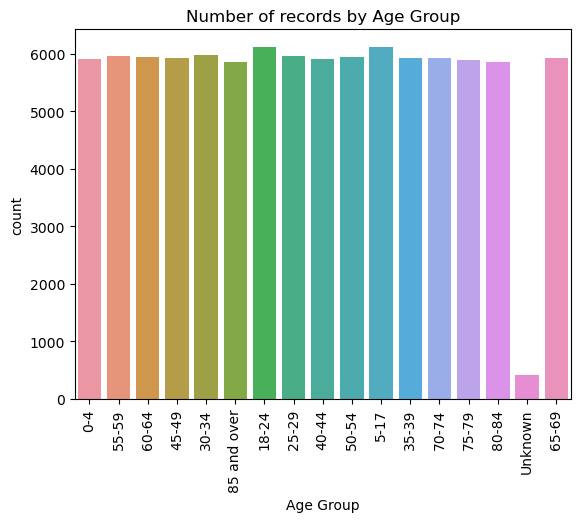

In [26]:
## counts by Age Group variable
plot = sns.countplot(x="Age_ItemName_ENG", data=ED_wales_data_cln)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set(title="Number of records by Age Group", xlabel="Age Group")

#### **Hospital** variable (`Hospital_ItemName_ENG`)

In [30]:
print("Number of unique categories for Hospital variable: ", ED_wales_data_cln['Hospital_ItemName_ENG'].nunique())

Number of unique categories for Hospital variable:  39


[Text(0.5, 1.0, 'Number of records by Hospital'), Text(0.5, 0, 'Hospital')]

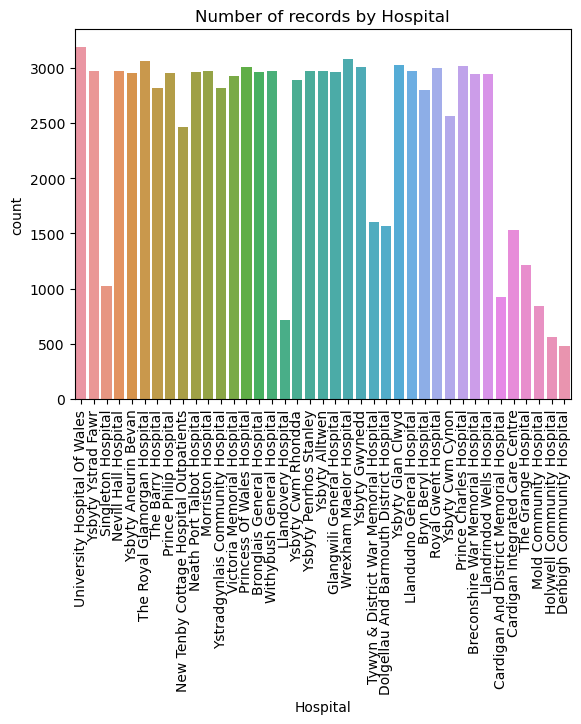

In [12]:
## counts by Hospital variable
plot = sns.countplot(x="Hospital_ItemName_ENG", data=ED_wales_data_cln)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set(title="Number of records by Hospital", xlabel="Hospital")

#### **Local Health Board** variable (`LHB`)

In [31]:
print("Number of unique categories for LHB variable: ", ED_wales_data_cln['LHB'].nunique())

Number of unique categories for LHB variable:  9


[Text(0.5, 1.0, 'Number of records by Local Health Board'),
 Text(0.5, 0, 'Local Health Board')]

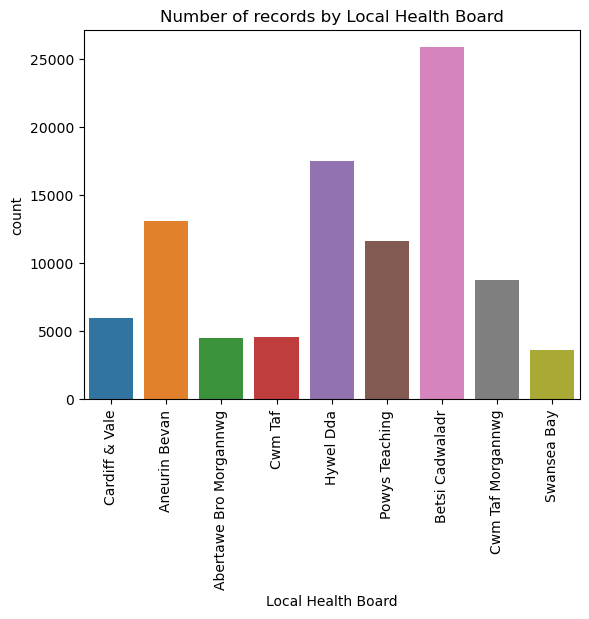

In [21]:
## counts by Welsh Local Health Board
plot = sns.countplot(x="LHB", data=ED_wales_data_cln)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set(title="Number of records by Local Health Board", xlabel="Local Health Board")

## **4. Fitting a time series model to the historical data**

In order to handle time series data I will use a specialised python library, [**`pytimeTK`**](https://business-science.github.io/pytimetk/guides/01_visualization.html)

In [23]:
import sktime

## **5. Forecasting**

## **6. Anomaly identification**